# House Price Prediction Project

## Import modules and load train and tast data

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import mutual_info_regression
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score


train_data = pd.read_csv('data/train.csv') 
test_data = pd.read_csv('data/test.csv')

train_data.set_index("Id",inplace = True)
test_data.set_index("Id",inplace = True)


pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
sns.set_style("whitegrid")

### Basic exploration of the dataset

In [2]:
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [3]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
#sns.pairplot(train_data.iloc[:,:5])

### Sale price distribution plot


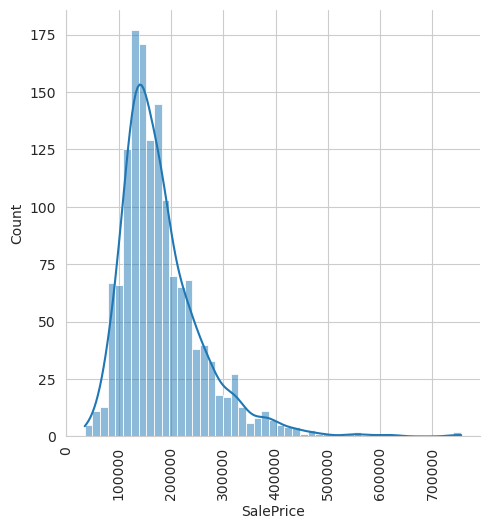

In [7]:
sns.displot(train_data["SalePrice"],kde = True)
plt.xticks(rotation = 90)
plt.show()

### Explore Neighborhood column

### Mean SalePrice for each neighborhood

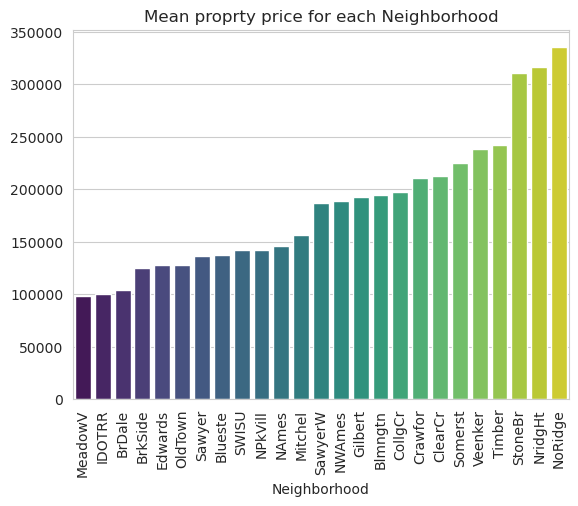

In [8]:
neighborhood_data = train_data.groupby("Neighborhood")["SalePrice"].mean().sort_values()

sns.barplot(x = neighborhood_data.index,y = neighborhood_data.values,palette = "viridis")
plt.xticks(rotation = 90)
plt.title("Mean proprty price for each Neighborhood")
plt.show()

### Boxplots are ordered by median value

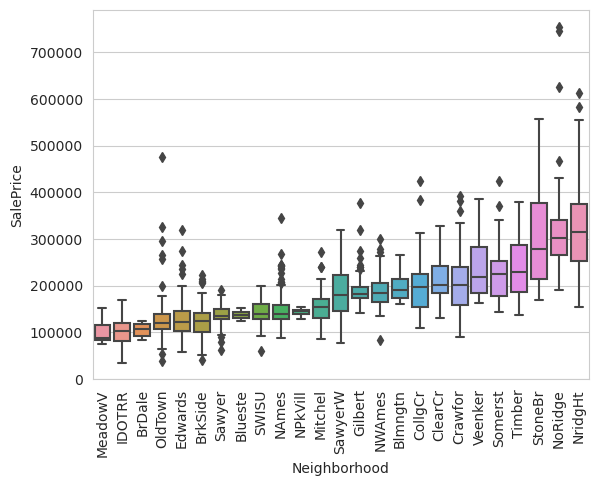

In [9]:

my_order = train_data.groupby(by=["Neighborhood"])["SalePrice"].median().sort_values().index
sns.boxplot(x = train_data.Neighborhood,y = train_data.SalePrice,order = my_order)
sns.set(rc = {'figure.figsize':(20,8)})
plt.xticks(rotation = 90)

plt.show()

### Analyze missing values

In [10]:
y_train = train_data["SalePrice"]
X_train = train_data.drop("SalePrice",axis = 1)

numerical_cols = X_train.select_dtypes(include=np.number).columns
categorical_cols = X_train.select_dtypes(include="object").columns

### Visualize missing values

In [11]:
def visualize_missing_values():
    
    if not missing_values.empty:
        sns.barplot(x = missing_values.index,y = (missing_values.values/len(train_data))*100,palette = "rocket_r")
        plt.xticks(rotation = 90)
        plt.xlabel('Categories with missing values', fontsize=18)
        plt.ylabel('Percentage of missing values', fontsize=18)
        plt.title('Missing values for all columns',fontsize = 25)
        plt.show()
    else:
        print("There is no missing values")

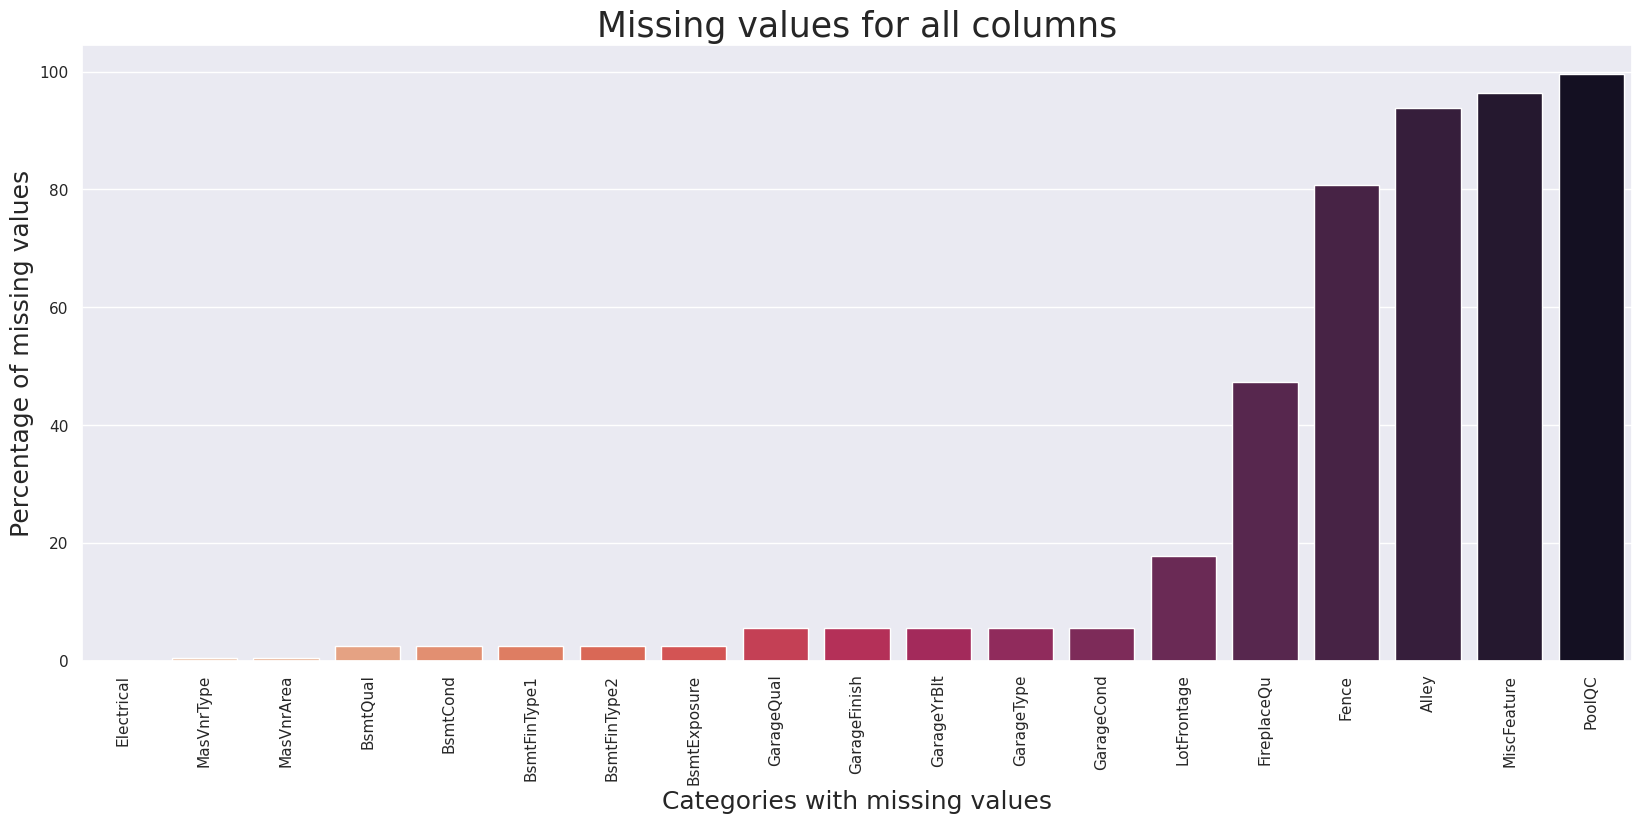

In [12]:
missing_values = X_train.isnull().sum().sort_values()
missing_values = missing_values[missing_values > 0]
visualize_missing_values()

### Drop columns with large number of missing values(>70%)

In [13]:
drop_cols = missing_values.loc[(missing_values/len(X_train))*100 > 70].index.tolist()
X_train.drop(drop_cols,axis = 1,inplace = True)


In [14]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal


# Handle missing values

Missing values in FireplaceQu column are because of there is no fireplace,therefore i fill values with None[Same for GarageCond,GarageQual,GarageFinish,BsmtCond,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,MasVnrType,GarageType]; Since every property should have lotfrontage, values in this column missing,because this data was not collected[Will the missing values with the median value in specific column(based on boxPlot in someNeighborhoods there are some outliers,and using mean can overestimate or underastimate this value)]. Missing values in MasVnrArea will be filled 0,since in these rows there is no MasVnrType. GarageYrBlt column has missing values,beacuse there is no garage, therefore I fill this values with the HouseYrBuilt

In [15]:
def handle_missing_values(df):
    df["MasVnrArea"] = df["MasVnrArea"].fillna(0)
    df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.mean()))
    df[["MasVnrType","FireplaceQu","GarageCond","GarageQual","GarageFinish","GarageType","BsmtCond","BsmtQual","BsmtFinType1","BsmtFinType2","BsmtExposure"]] = df[["MasVnrType","FireplaceQu","GarageCond","GarageQual","GarageFinish","GarageType","BsmtCond","BsmtQual","BsmtFinType1","BsmtFinType2","BsmtExposure"]].fillna("None")
    df["GarageYrBlt"] = df["GarageYrBlt"].fillna(0)
    df["Electrical"] = df["Electrical"].fillna(df["Electrical"].value_counts().index[0])

### since for the instance with missing value for the electrical column there are all utilities(Electricity is included here),missing value is here because this information was not collected, therefore i fill this value with the most frequent value [There is huge difference between them os it should be ok]

In [16]:
handle_missing_values(X_train)

# Encoding of categorical variables

A label encoding is okay for any kind of categorical feature when you're using a tree-ensemble like XGBoost, even for unordered categories. If you wanted to try a linear regression model (also popular in this competition), you would instead want to use a one-hot encoding, especially for the features with unordered categories.


In [17]:
categorical_cols = X_train.select_dtypes(include="object").columns
X_train[categorical_cols].nunique().sort_values()

Street            2
Utilities         2
CentralAir        2
LandSlope         3
PavedDrive        3
GarageFinish      4
LotShape          4
LandContour       4
ExterQual         4
MasVnrType        4
KitchenQual       4
BsmtCond          5
BsmtQual          5
HeatingQC         5
ExterCond         5
MSZoning          5
BsmtExposure      5
BldgType          5
LotConfig         5
Electrical        5
FireplaceQu       6
GarageQual        6
GarageCond        6
Heating           6
Foundation        6
RoofStyle         6
SaleCondition     6
BsmtFinType1      7
Functional        7
GarageType        7
BsmtFinType2      7
RoofMatl          8
HouseStyle        8
Condition2        8
SaleType          9
Condition1        9
Exterior1st      15
Exterior2nd      16
Neighborhood     25
dtype: int64

In [18]:
nominal_cols = ["CentralAir","LandSlope","PavedDrive","LotShape","LandContour","MasVnrType","MSZoning",
                "Electrical","LotConfig","BldgType","SaleCondition","Foundation","RoofStyle","Heating",
                "GarageType","Condition2","HouseStyle","RoofMatl","SaleType","Condition1","Exterior1st","Exterior2nd","Neighborhood","Utilities","Street"]


ordinal_cols = ["GarageFinish","KitchenQual","ExterQual","HeatingQC","BsmtExposure","BsmtCond","ExterCond",
                "BsmtQual","GarageCond","GarageQual","FireplaceQu","BsmtFinType1","BsmtFinType2","Functional"]


In [19]:
def encode(df): 
    le = LabelEncoder()
    df[nominal_cols] = df[nominal_cols].apply(LabelEncoder().fit_transform)
    
    six_features_cols = ["FireplaceQu","GarageCond","GarageQual","BsmtCond","BsmtQual"]
    five_features_cols = ["KitchenQual","ExterQual","HeatingQC","ExterCond"]
    bsmntType_cols = ["BsmtFinType1","BsmtFinType2"]
    garageFinish_col = {"None" : 0,"Unf" : 1,"RFn" : 2,"Fin" : 3}
    six_feature_encodings = {'None' : 0, 'Po' : 1, 'Fa' : 2,'TA' : 3,'Gd' : 4,"Ex" : 5}
    five_feature_encodings = {'Po' : 0, 'Fa' : 1,'TA' : 2,'Gd' : 3,"Ex" : 4}
    bsmnt_encodings = {'None' : 0, 'Unf' : 1, 'LwQ' : 2,'Rec' : 3,'BLQ' : 4,"ALQ" : 5,"GLQ" : 6}
    
    for col in six_features_cols:
        df[col] = df[col].map(six_feature_encodings)
        
    # garageFinish
    df["GarageFinish"] = df["GarageFinish"].map(garageFinish_col)
    
    for col in five_features_cols:
        df[col] = df[col].map(five_feature_encodings)
     
    for col in bsmntType_cols:
        df[col] = df[col].map(bsmnt_encodings)
    
    df["BsmtExposure"] =  df["BsmtExposure"].map({"None" : 0, "No" : 1, "Mn" : 2,"Av": 3,"Gd" : 4})
    df["Functional"] =  df["Functional"].map({"Sal" : 0, "Sev" : 1, "Maj2" : 2,"Maj1": 3,"Mod" : 4,"Min2" : 5,"Min1" : 6,"Typ" : 7})
    
    

In [20]:
encode(X_train)


# Feature Engineering

### Do Finished Basements Count Towards Square Footage of a Home?
The answer is YES and NO. If you have a finished basement, it should be considered part of the square footage of your home. The key word is “finished”.  An unfinished basement is not ever going to be considered when calculating square footage.

In [21]:
def develop_feature():
    X_train["TotalSF"] = X_train["1stFlrSF"] + X_train["2ndFlrSF"] + X_train["TotalBsmtSF"] - X_train["BsmtUnfSF"]
    X_train["Above_grade_proportion"] = X_train["GrLivArea"]/X_train["TotalSF"]
    X_train['Total_Bathrooms'] = (X_train['FullBath'] + (0.5 * X_train['HalfBath']) +
                                    X_train['BsmtFullBath'] + (0.5 * X_train['BsmtHalfBath']))



In [22]:
develop_feature()

# Feature selection
I will use mutual information to do it. the mutual information (MI) of two random variables is a measure of the mutual dependence between the two variables. More specifically, it quantifies the "amount of information" obtained about one random variable by observing the other random variable. The concept of mutual information is intimately linked to that of entropy of a random variable, a fundamental notion in information theory that quantifies the expected "amount of information" held in a random variable.

In [23]:
def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [24]:
categorical_cols = X_train.select_dtypes(include="object").columns
categorical_cols

Index([], dtype='object')

In [25]:
mi_scores = make_mi_scores(X_train,y_train)
mi_scores

OverallQual               0.562983
Neighborhood              0.508970
GrLivArea                 0.482077
TotalSF                   0.477384
TotalBsmtSF               0.365583
GarageArea                0.363023
GarageCars                0.362548
YearBuilt                 0.360221
Total_Bathrooms           0.338798
ExterQual                 0.333998
KitchenQual               0.327971
BsmtQual                  0.313472
1stFlrSF                  0.309380
MSSubClass                0.277393
FullBath                  0.264553
GarageFinish              0.260300
GarageYrBlt               0.258371
YearRemodAdd              0.242198
LotFrontage               0.229294
TotRmsAbvGrd              0.225180
FireplaceQu               0.214635
GarageType                0.206668
2ndFlrSF                  0.200141
Foundation                0.196529
Exterior2nd               0.179681
HeatingQC                 0.174330
Fireplaces                0.169710
LotArea                   0.157427
BsmtFinType1        

### Visualize mutual inforamtion scores

In [26]:
#sns.barplot(x = mi_scores.values,y = mi_scores.index,orient = "h")

### Drop columns which have mutual_inforamtion equal to 0


In [27]:
zero_mi_cols = mi_scores[mi_scores  == 0]
X_train.drop(zero_mi_cols.index,axis = 1,inplace = True)

In [28]:
zero_mi_cols

ExterCond     0.0
MoSold        0.0
YrSold        0.0
Utilities     0.0
Condition2    0.0
Name: MI Scores, dtype: float64

In [29]:
corr_matrix = pd.concat([X_train,y_train],axis = 1).corr()

<AxesSubplot:>

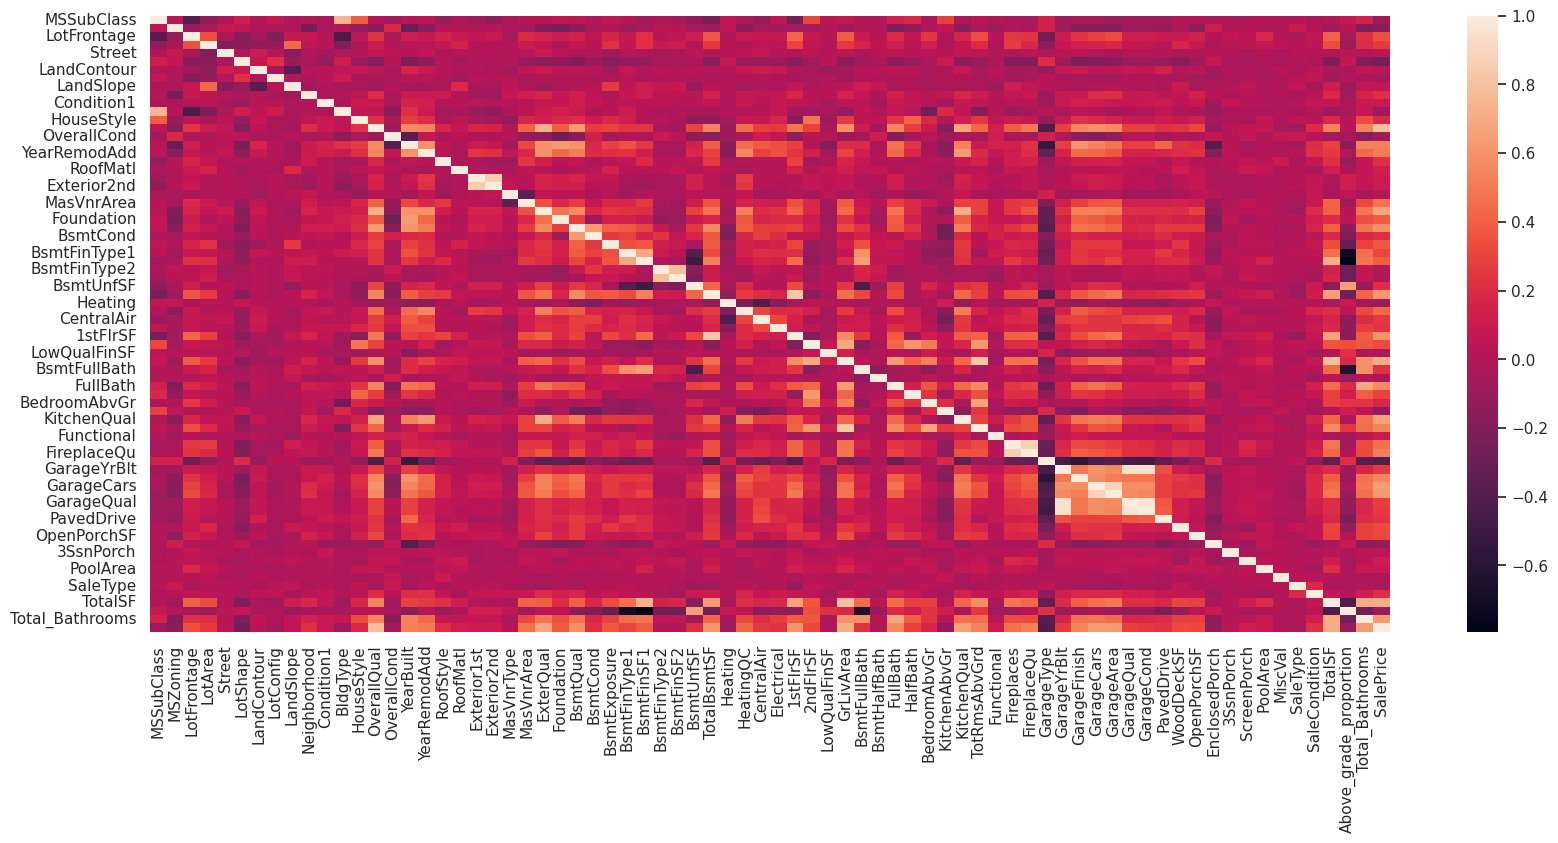

In [30]:
sns.heatmap(corr_matrix)

In [31]:
important_cols = list(corr_matrix["SalePrice"][(corr_matrix["SalePrice"]>0.50) | (corr_matrix["SalePrice"]<-0.50)].sort_values(ascending = False).index)
important_cols

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'TotalSF',
 'ExterQual',
 'KitchenQual',
 'GarageCars',
 'Total_Bathrooms',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'BsmtQual',
 'FullBath',
 'GarageFinish',
 'TotRmsAbvGrd',
 'YearBuilt',
 'FireplaceQu',
 'YearRemodAdd']

### Note that Correlation matrix will be mirror image about the diagonal and all the diagonal elements will be 1. So, It does not matter that we select the upper triangular or lower triangular part of the correlation matrix but we should not include the diagonal elements. So we are selecting the upper traingular.

In [32]:
pd.concat([X_train,y_train],axis = 1).corr()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,TotalSF,Above_grade_proportion,Total_Bathrooms,SalePrice
MSSubClass,1.000000,0.035900,-0.374130,-0.139781,-0.024969,0.119289,-0.002940,0.075910,-0.025672,-0.005985,-0.024762,0.746063,0.397161,0.032628,-0.059316,0.027850,0.040581,-0.117817,-0.031336,-0.089159,-0.137229,-0.029850,0.023573,0.016178,0.058126,0.051122,-0.015839,0.051150,0.027389,-0.069836,-0.024330,-0.065649,-0.140759,-0.238518,0.048009,-0.019458,-0.101774,0.051945,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,-0.012383,0.040380,-0.006716,-0.045569,-0.039201,0.133138,-0.080997,-0.033077,-0.040110,-0.098672,-0.072946,-0.089846,-0.059925,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,0.012464,-0.024940,-0.006936,0.082643,0.151048,-0.084284
MSZoning,0.035900,1.000000,-0.108397,-0.034452,0.087654,0.061887,-0.017854,-0.009895,-0.022055,-0.249679,-0.027874,0.005690,-0.105315,-0.160099,0.186951,-0.308908,-0.174728,-0.000301,0.005133,-0.008558,0.006963,-0.028279,-0.062830,-0.195689,-0.235174,-0.168940,-0.037842,-0.017745,-0.091545,-0.049128,0.042068,0.028086,-0.046749,-0.087834,0.056866,-0.162866,-0.049523,-0.070818,-0.055614,-0.051481,0.011520,-0.082615,-0.018526,0.007193,-0.198290,-0.133876,-0.016471,0.049434,-0.160914,-0.043200,-0.091531,-0.011349,-0.025550,0.141142,-0.073915,-0.167695,-0.157042,-0.189250,-0.087057,-0.079824,-0.100366,-0.009477,-0.154704,0.115509,0.000362,0.019089,-0.003128,0.009293,0.097437,0.009494,-0.079909,0.005039,-0.193097,-0.166872
LotFrontage,-0.374130,-0.108397,1.000000,0.336997,-0.039533,-0.178934,-0.071014,-0.203150,0.085377,0.082486,0.001296,-0.438165,0.048938,0.236282,-0.047448,0.127706,0.086681,0.152972,0.093104,0.067257,0.091939,-0.036644,0.188632,0.162712,0.104742,0.143093,0.053284,0.161971,0.087865,0.227212,0.026780,0.047569,0.116231,0.370780,-0.022790,0.091128,0.081077,0.069568,0.423764,0.085955,0.030483,0.385982,0.101622,0.006766,0.190212,0.064000,0.249479,-0.009424,0.171830,0.335004,0.022887,0.256667,0.239860,-0.271967,0.108968,0.230915,0.279995,0.332306,0.119721,0.115070,0.097933,0.093130,0.140304,0.002560,0.065735,0.039270,0.174520,0.010560,-0.032594,0.051031,0.403942,-0.055028,0.222082,0.346962
LotArea,-0.139781,-0.034452,0.336997,1.000000,-0.197131,-0.165315,-0.149083,-0.121161,0.436868,0.044569,0.023846,-0.205721,-0.033190,0.105806,-0.005636,0.014228,0.013788,0.077054,0.149837,0.004256,-0.003930,-0.008122,0.103321,0.055570,-0.011081,0.072336,0.031349,0.228830,0.058995,0.214103,0.086629,0.111170,-0.002618,0.260833,0.028158,0.003581,0.049755,0.043856,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.067864,0.190015,-0.025128,0.271364,0.185332,-0.150162,0.072599,0.124756,0.154871,0.180403,0.079313,0.076097,0.015134,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.012292,0.034169,0.327672,-0.094612,0.204764,0.263843
Street,-0.024969,0.087654,-0.039533,-0.197131,1.000000,-0.010224,0.115995,0.013960,-0.179360,-0.011561,-0.071657,-0.018243,0.023704,0.058823,0.042848,0.021137,0.065465,-0.019732,0.008081,0.002505,0.006166,0.010007,0.017108,0.100247,0.035277,0.011416,-0.007573,-0.092504,0.016643,-0.015643,-0.078212,-0.038487,0.035229,0.005068,0.007904,0.043211

## Feature engineering

### Do Finished Basements Count Towards Square Footage of a Home?
The answer is YES and NO. If you have a finished basement, it should be considered part of the square footage of your home. The key word is “finished”.  An unfinished basement is not ever going to be considered when calculating square footage. 

In [33]:
def develop_feature():
    X_train["TotalSF"] = X_train["1stFlrSF"] + X_train["2ndFlrSF"] + X_train["TotalBsmtSF"] - X_train["BsmtUnfSF"]
    X_train["Above_grade_proportion"] = X_train["GrLivArea"]/X_train["TotalSF"]
#     X_train['Total_Bathrooms'] = (X_train['FullBath'] + (0.5 * X_train['HalfBath']) +
#                                    X_train['BsmtFullBath'] + (0.5 * X_train['BsmtHalfBath']))



In [34]:
develop_feature()

## Prepare test data

In [35]:
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [36]:

def prepare_test_data():
    
    test_data.drop(drop_cols,inplace = True,axis = 1)
    test_data["MasVnrArea"] = test_data["MasVnrArea"].fillna(0)
    #here I am filling missing values in test_data with mean values from train_data 
    test_data["LotFrontage"] = test_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.mean()))
    test_data[["MasVnrType","FireplaceQu","GarageCond","GarageQual","GarageFinish","GarageType","BsmtCond","BsmtQual","BsmtFinType1","BsmtFinType2","BsmtExposure"]] = test_data[["MasVnrType","FireplaceQu","GarageCond","GarageQual","GarageFinish","GarageType","BsmtCond","BsmtQual","BsmtFinType1","BsmtFinType2","BsmtExposure"]].fillna("None")
    test_data["GarageYrBlt"] = test_data["GarageYrBlt"].fillna(0)
    test_data["Electrical"] = test_data["Electrical"].fillna(test_data["Electrical"].value_counts().index[0])
    encode(test_data)
    
    test_data["TotalSF"] = test_data["1stFlrSF"] + test_data["2ndFlrSF"] + test_data["TotalBsmtSF"] - test_data["BsmtUnfSF"]
    test_data["Above_grade_proportion"] = test_data["GrLivArea"]/test_data["TotalSF"]
    test_data['Total_Bathrooms'] = (test_data['FullBath'] + (0.5 * test_data['HalfBath']) +
                               test_data['BsmtFullBath'] + (0.5 * test_data['BsmtHalfBath']))
    #drop cols with low mi_score
    test_data.drop(zero_mi_cols.index,axis = 1,inplace = True)
    
    
    
    



In [37]:
prepare_test_data()

### Decision trees are also not sensitive to outliers since the partitioning happens based on the proportion of samples within the split ranges and not on absolute values.

# Hyperparametres tuning 

## Just tuning these by hand can give you great results. However, you might like to try using one of scikit-learn's automatic hyperparameter tuners. Or you could explore more advanced tuning libraries like Optuna or scikit-optimize.

Here is how you can use Optuna with XGBoost:

In [38]:
def score_dataset(X, y, model=XGBRegressor()):
    # Metric for Housing competition is RMSLE (Root Mean Squared Log Error)
    log_y = np.log(y)
    score = cross_val_score(
        model, X, log_y, cv=5, scoring="neg_mean_squared_error",
    )
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score

## Hyperparameter tuning

In [39]:
# import optuna
# from xgboost import XGBRegressor
# from sklearn.model_selection import cross_val_score

# def objective(trial):
#     xgb_params = dict(
#         max_depth=trial.suggest_int("max_depth", 2, 10),
#         learning_rate=trial.suggest_float("learning_rate", 1e-4, 1e-1, log=True),
#         n_estimators=trial.suggest_int("n_estimators", 1000, 8000),
#         min_child_weight=trial.suggest_int("min_child_weight", 1, 10),
#         colsample_bytree=trial.suggest_float("colsample_bytree", 0.2, 1.0),
#         subsample=trial.suggest_float("subsample", 0.2, 1.0),
#         reg_alpha=trial.suggest_float("reg_alpha", 1e-4, 1e2, log=True),
#         reg_lambda=trial.suggest_float("reg_lambda", 1e-4, 1e2, log=True),
#     )
#     xgb = XGBRegressor(**xgb_params)
#     return score_dataset(X_train, y_train, xgb)

# study = optuna.create_study(direction="minimize")
# study.optimize(objective, n_trials=20)
# xgb_params = study.best_params

In [40]:
xgb_params = {'max_depth': 3,
 'learning_rate': 0.011187642634876746,
 'n_estimators': 3348,
 'min_child_weight': 1,
 'colsample_bytree': 0.5882524218748777,
 'subsample': 0.5515581824702738,
 'reg_alpha': 0.7581459133388271,
 'reg_lambda': 12.359838795482325}

In [41]:
xgb = XGBRegressor(**xgb_params)
# XGB minimizes MSE, but competition loss is RMSLE
# So, we need to log-transform y to train and exp-transform the predictions

xgb.fit(X_train, np.log(y_train))
predictions = np.exp(xgb.predict(test_data))

In [42]:
output = pd.DataFrame({'Id': test_data.index, 'SalePrice': predictions})
output.to_csv('my_submission.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!
